In [28]:
import ROOT as R
import math
import os
import numpy as np

R.gStyle.SetOptStat(0)
R.gStyle.SetGridColor(14)
R.gStyle.SetPadRightMargin(0.03)
R.gStyle.SetPadLeftMargin(0.12)

# pull files from local drive
STUDY_NAME = "comp_clusters"
TIME = "30ps"
DIR_IN = '/Users/chris/Desktop/MC/data/comp_3vs10tev/'
DIR_OUT = '/Users/chris/Desktop/MC/plots/comp_3vs10tev'
NAMES = ["3tev","10tev"]
NAMES_TIMINGCUT = ["timingcut_3tev","timingcut_10tev"]
NAMES_SIGNAL = ["signal_10ke_3tev","signal_10ke_10tev"]
files_in = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES]
files_in_timingcut = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES_TIMINGCUT]
files_in_signal = [R.TFile(os.path.join(DIR_IN,f'histograms_{n}.root')) for n in NAMES_SIGNAL]
files_in_loosecluster = [R.TFile(os.path.join(DIR_IN,f'histograms_loosecluster_{n}.root')) for n in NAMES]
files_in_tightcluster = [R.TFile(os.path.join(DIR_IN,f'histograms_tightcluster_{n}.root')) for n in NAMES]

# extract contents from files
nH = len(NAMES)
histos_theta   = [files_in[i].MyTrackPerf.clusters_vb.theta for i in range(nH)]
histos_theta_ib= [files_in[i].MyTrackPerf.clusters_ib.theta for i in range(nH)]
histos_edep90  = [files_in[i].MyTrackPerf.clusters_vb.edep_89to91deg for i in range(nH)]
histos_edep90_signal = [files_in_signal[i].MyTrackPerf.clusters_vb.edep_89to91deg for i in range(nH)]
histos_edep0   = [files_in[i].MyTrackPerf.clusters_vb.edep_0to5deg for i in range(nH)]
histos_vxbtime = []
histos_vxbtime = [files_in[i].MySimHitHistos.Vertex.t for i in range(nH)]
histos_itbtime = [files_in[i].MySimHitHistos.IT.t for i in range(nH)]

# timing cut histos
histos_theta_timingcut   = [files_in_timingcut[i].MyTrackPerf.clusters_vb.theta for i in range(nH)]
histos_theta_timingcut_ib= [files_in_timingcut[i].MyTrackPerf.clusters_ib.theta for i in range(nH)]
histos_vxbtime_timingcut = [files_in_timingcut[i].MySimHitHistos.Vertex.t for i in range(nH)]
histos_itbtime_timingcut = [files_in_timingcut[i].MySimHitHistos.IT.t for i in range(nH)]

# loose and tight cluster histos (just for comparing hit density)
histos_loosecluster = [files_in_loosecluster[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
histos_tightcluster = [files_in_tightcluster[i].MyTrackPerf.clusters_vb.numhits_by_layer for i in range(nH)]
histos_loosecluster_ib = [files_in_loosecluster[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]
histos_tightcluster_ib = [files_in_tightcluster[i].MyTrackPerf.clusters_ib.numhits_by_layer for i in range(nH)]

# signal histos
histos_theta_signal   = [files_in_signal[i].MyTrackPerf.clusters_vb.theta for i in range(nH)]
histos_vxbtime_signal = [files_in_signal[i].MySimHitHistos.Vertex.t for i in range(nH)]
histos_itbtime_signal = [files_in_signal[i].MySimHitHistos.IT.t for i in range(nH)]


# combined histos
histos_3tev_theta = [h[0] for h in [histos_theta, histos_theta_signal]]
histos_10tev_theta = [h[1] for h in [histos_theta, histos_theta_signal]]

histos_3tev_vxbtime = [h[0] for h in [histos_vxbtime, histos_vxbtime_signal]]
histos_10tev_vxbtime = [h[1] for h in [histos_vxbtime, histos_vxbtime_signal]]

histos_3tev_itbtime = [h[0] for h in [histos_itbtime, histos_itbtime_signal]]
histos_10tev_itbtime = [h[1] for h in [histos_itbtime, histos_itbtime_signal]]

#histos_alltime = []
#for i in range(nH): 
#    histos_alltime.append(files_in[i].MySimHitHistos.Vertex.t)
#    histos_alltime[i].Add(histos_itbtime[i])

# make plot of theta comparison
names = [
    '3 TeV',
    '10 TeV',
]

# Normalize Theta Histograms

In [17]:
# determine total hit counts

h_3tev = histos_theta[0]
h_10tev = histos_theta[1]
h_3tev_ib = histos_theta_ib[0]
h_10tev_ib = histos_theta_ib[1]
numbins_ib = h_3tev_ib.GetNbinsX()

tothits_3tev = np.sum([h_3tev.GetBinContent(i) for i in range(numbins)])
tothits_10tev = np.sum([h_10tev.GetBinContent(i) for i in range(numbins)])

tothits_3tev_ib = np.sum([h_3tev_ib.GetBinContent(i) for i in range(numbins_ib)])
tothits_10tev_ib = np.sum([h_10tev_ib.GetBinContent(i) for i in range(numbins_ib)])


h_3tev_signal = histos_theta_signal[0]
h_10tev_signal = histos_theta_signal[1]
numbins_signal = h_3tev_signal.GetNbinsX()

tothits_3tev_signal = np.sum([h_3tev_signal.GetBinContent(i) for i in range(numbins_signal)])
tothits_10tev_signal = np.sum([h_10tev_signal.GetBinContent(i) for i in range(numbins_signal)])


# get hit counts for timing cut, clusters, vb
nhits_timing_3tev = np.sum([histos_theta_timingcut[0].GetBinContent(i) for i in range(histos_theta_timingcut[0].GetNbinsX())])
nhits_timing_10tev = np.sum([histos_theta_timingcut[1].GetBinContent(i) for i in range(histos_theta_timingcut[1].GetNbinsX())])

nhits_loose_3tev = np.sum([histos_loosecluster[0].GetBinContent(i) for i in range(histos_loosecluster[0].GetNbinsX())])
nhits_loose_10tev = np.sum([histos_loosecluster[1].GetBinContent(i) for i in range(histos_loosecluster[1].GetNbinsX())])

nhits_tight_3tev = np.sum([histos_tightcluster[0].GetBinContent(i) for i in range(histos_tightcluster[0].GetNbinsX())])
nhits_tight_10tev = np.sum([histos_tightcluster[1].GetBinContent(i) for i in range(histos_tightcluster[1].GetNbinsX())])

# get hit counts for timing cut, clusters, ib
nhits_timing_3tev_ib = np.sum([histos_theta_timingcut_ib[0].GetBinContent(i) for i in range(histos_theta_timingcut_ib[0].GetNbinsX())])
nhits_timing_10tev_ib = np.sum([histos_theta_timingcut_ib[1].GetBinContent(i) for i in range(histos_theta_timingcut_ib[1].GetNbinsX())])

nhits_loose_3tev_ib = np.sum([histos_loosecluster_ib[0].GetBinContent(i) for i in range(histos_loosecluster_ib[0].GetNbinsX())])
nhits_loose_10tev_ib = np.sum([histos_loosecluster_ib[1].GetBinContent(i) for i in range(histos_loosecluster_ib[1].GetNbinsX())])

nhits_tight_3tev_ib = np.sum([histos_tightcluster_ib[0].GetBinContent(i) for i in range(histos_tightcluster_ib[0].GetNbinsX())])
nhits_tight_10tev_ib = np.sum([histos_tightcluster_ib[1].GetBinContent(i) for i in range(histos_tightcluster_ib[1].GetNbinsX())])


# Normalize the signal histograms to the same total multiplicity. 
scale_3tev = tothits_3tev/tothits_3tev_signal
scale_10tev = tothits_10tev/tothits_10tev_signal
#print(scale_3tev,scale_10tev)

# scale the contents of each bin
#for bin in range(numbins_signal):
#    h_3tev_signal.SetBinContent(bin,h_3tev_signal.GetBinContent(bin) * scale_3tev)
#    h_10tev_signal.SetBinContent(bin,h_10tev_signal.GetBinContent(bin) * scale_10tev)
    

print(tothits_3tev,nhits_timing_3tev,nhits_loose_3tev,nhits_tight_3tev)
print(tothits_10tev,nhits_timing_10tev,nhits_loose_10tev,nhits_tight_10tev)
print()
print(tothits_3tev_ib,nhits_timing_3tev_ib,nhits_loose_3tev_ib,nhits_tight_3tev_ib)
print(tothits_10tev_ib,nhits_timing_10tev_ib,nhits_loose_10tev_ib,nhits_tight_10tev_ib)

2703547.0 209270.0 110515.0 74492.0
2525657.0 26915.0 23364.0 21233.0

1694709.0 197368.0 447436.0 447195.0
2234980.0 22519.0 54725.0 54606.0


# Normalize simhit timing histos

In [75]:
# determine total hit counts

h_3tev = histos_itbtime[0]
h_10tev = histos_itbtime[1]
numbins = h_3tev.GetNbinsX()

tothits_3tev = np.sum([h_3tev.GetBinContent(i) for i in range(numbins)])
tothits_10tev = np.sum([h_10tev.GetBinContent(i) for i in range(numbins)])


h_3tev_signal = histos_itbtime_signal[0]
h_10tev_signal = histos_itbtime_signal[1]
numbins_signal = h_3tev_signal.GetNbinsX()

tothits_3tev_signal = np.sum([h_3tev_signal.GetBinContent(i) for i in range(numbins_signal)])
tothits_10tev_signal = np.sum([h_10tev_signal.GetBinContent(i) for i in range(numbins_signal)])

# Normalize the signal histograms to the same total multiplicity. 
scale_3tev = tothits_3tev/tothits_3tev_signal
scale_10tev = tothits_10tev/tothits_10tev_signal
print(scale_3tev,scale_10tev)

# scale the contents of each bin, SCALE BY 30%
for bin in range(numbins_signal):
    h_3tev_signal.SetBinContent(bin,h_3tev_signal.GetBinContent(bin) * scale_3tev * 0.30)
    h_10tev_signal.SetBinContent(bin,h_10tev_signal.GetBinContent(bin) * scale_10tev * 0.30)

9.99999995543708 9.999999975099874


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/theta_3vs10tev.png has been created


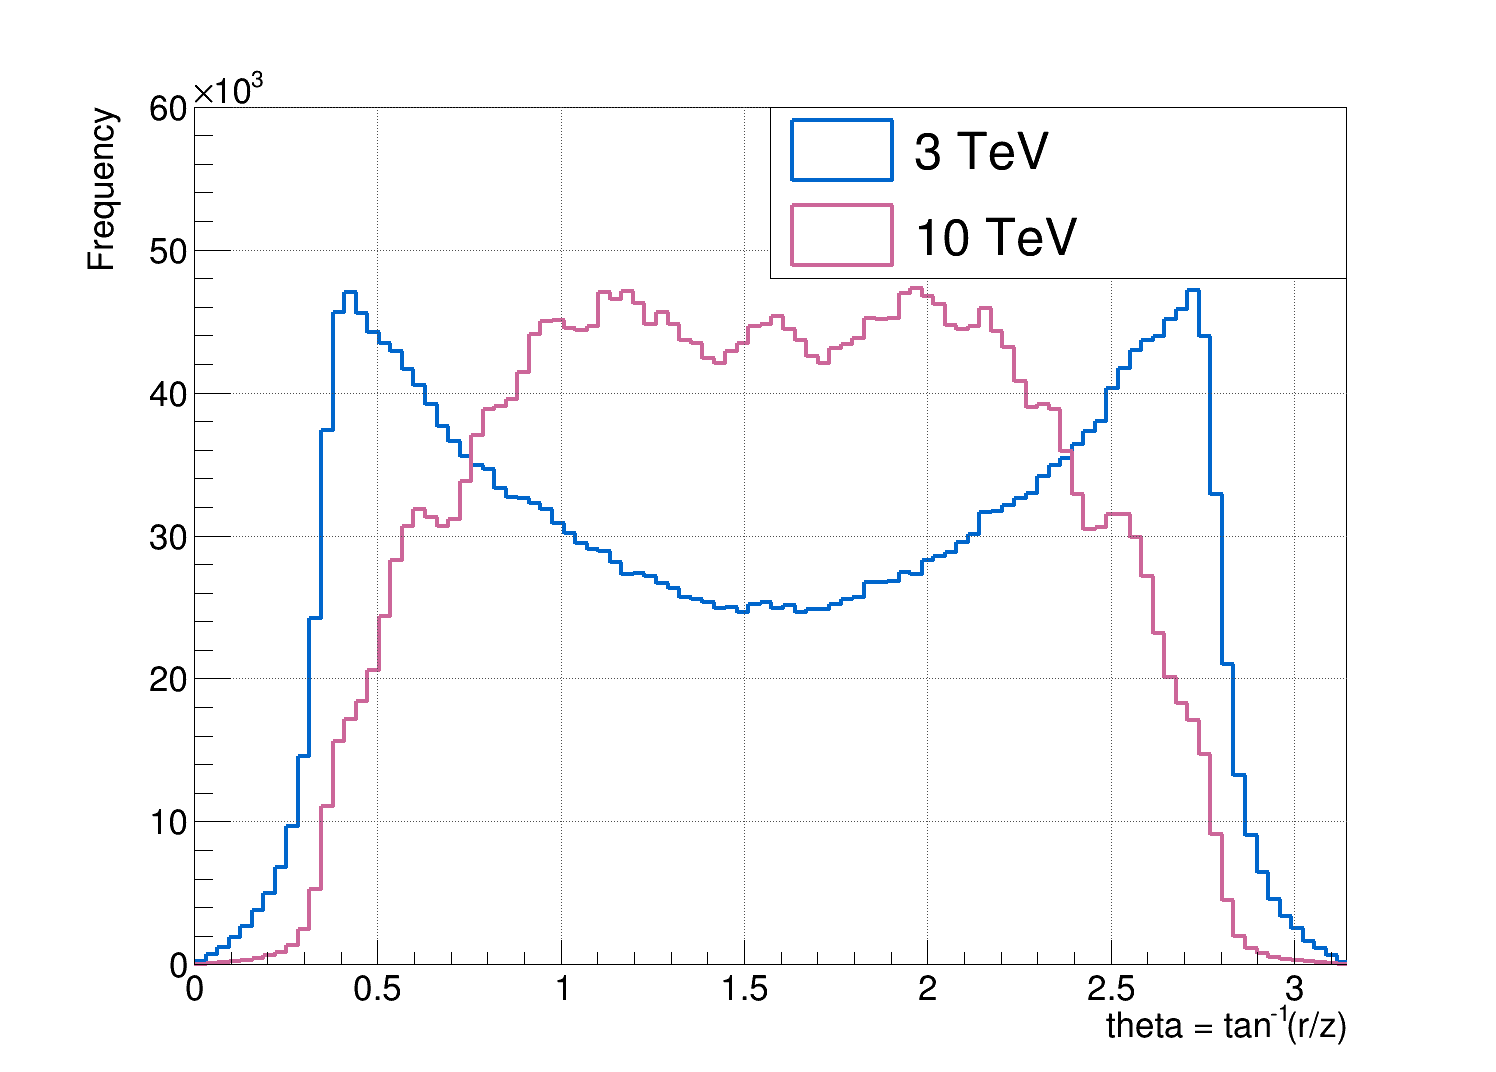

In [30]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
    #fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]

h_ax = R.TH1F('h_ax', 'Comparing trajected angle from tracker hits; theta = tan^{-1}(r/z);Frequency', 100, 0, 3.1416)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 60e3, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# find quantiles
nq = 20
xq, yq = [0] * nq, [0] * nq
for i in range(nq):
      xq[i] = (i+1)/nq
        
#quantiles = histos_theta[0].GetQuantiles(nq,xq)


# Drawing
for iT, h in enumerate(histos_theta):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()

C.SaveAs(os.path.join(DIR_OUT,"theta_3vs10tev.png"))

# 3 TeV Comparison of Signal Theta vs. BIB Theta

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/theta_3tev_signalvsbib.png has been created


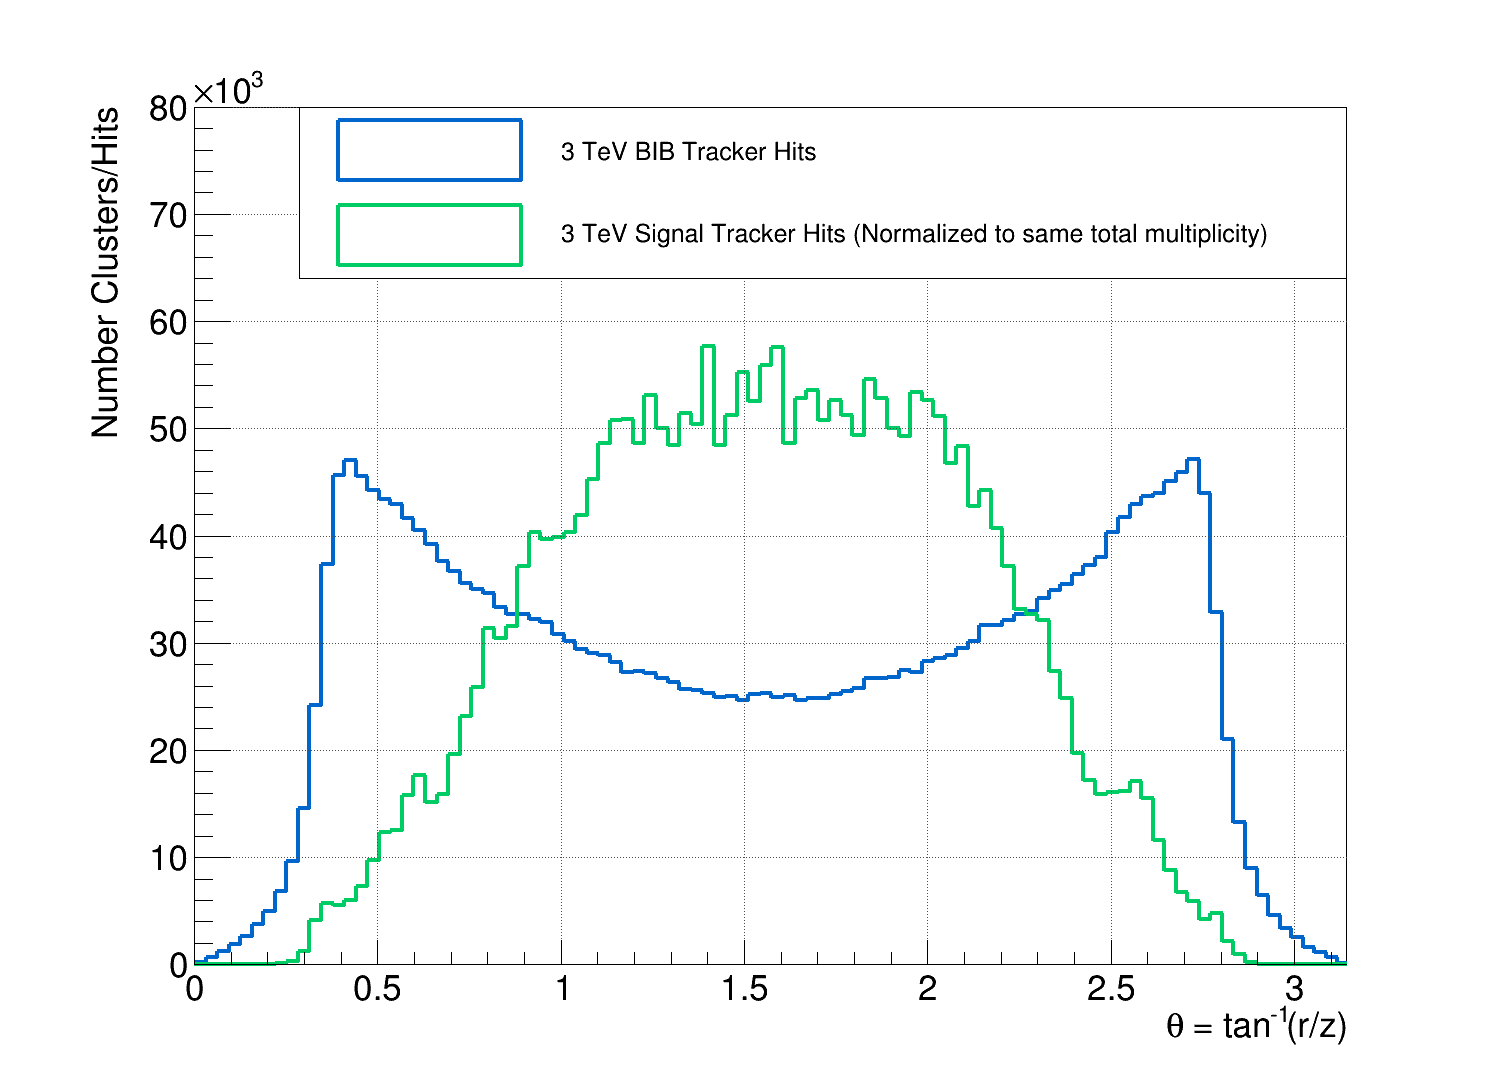

In [25]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

names_bytype = ["3 TeV BIB Tracker Hits", "3 TeV Signal Tracker Hits (Normalized to same total multiplicity)"]

leg = R.TLegend(0.2, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kTeal+2, R.kPink+2, R.kAzure+7, R.kTeal+2]
    #fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]

h_ax = R.TH1F('h_ax', '; #theta = tan^{-1}(r/z);Number Clusters/Hits', 100, 0, 3.1416)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 80e3, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_3tev_theta):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names_bytype[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()

C.SaveAs(os.path.join(DIR_OUT,"theta_3tev_signalvsbib.png"))

# 10 TeV Signal vs BIB theta comp

In [31]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

names_bytype = ["10 TeV BIB Tracker Hits", "10 TeV Signal Tracker Hits (Normalized to same total multiplicity)"]

leg = R.TLegend(0.2, 0.74, 0.9, 0.9)
colors = [R.kPink+2, R.kOrange+1, R.kTeal+2]
    #fills = [17,R.kOrange+1, R.kTeal+2, R.kAzure+8] # R.kOrange+1, R.kTeal+2
    # colors = [1, 11, 15]
    # fills = [0, 12, 16]

h_ax = R.TH1F('h_ax', '; #theta = tan^{-1}(r/z);Number Clusters/Hits', 100, 0, 3.1416)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 80e3, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_10tev_theta):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names_bytype[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()

C.SaveAs(os.path.join(DIR_OUT,"theta_10tev_signalvsbib.png"))

TypeError: void TH1::GetStats(double* stats) =>
    TypeError: takes at least 1 arguments (0 given)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/edep_lowtheta_3vs10tev.png has been created


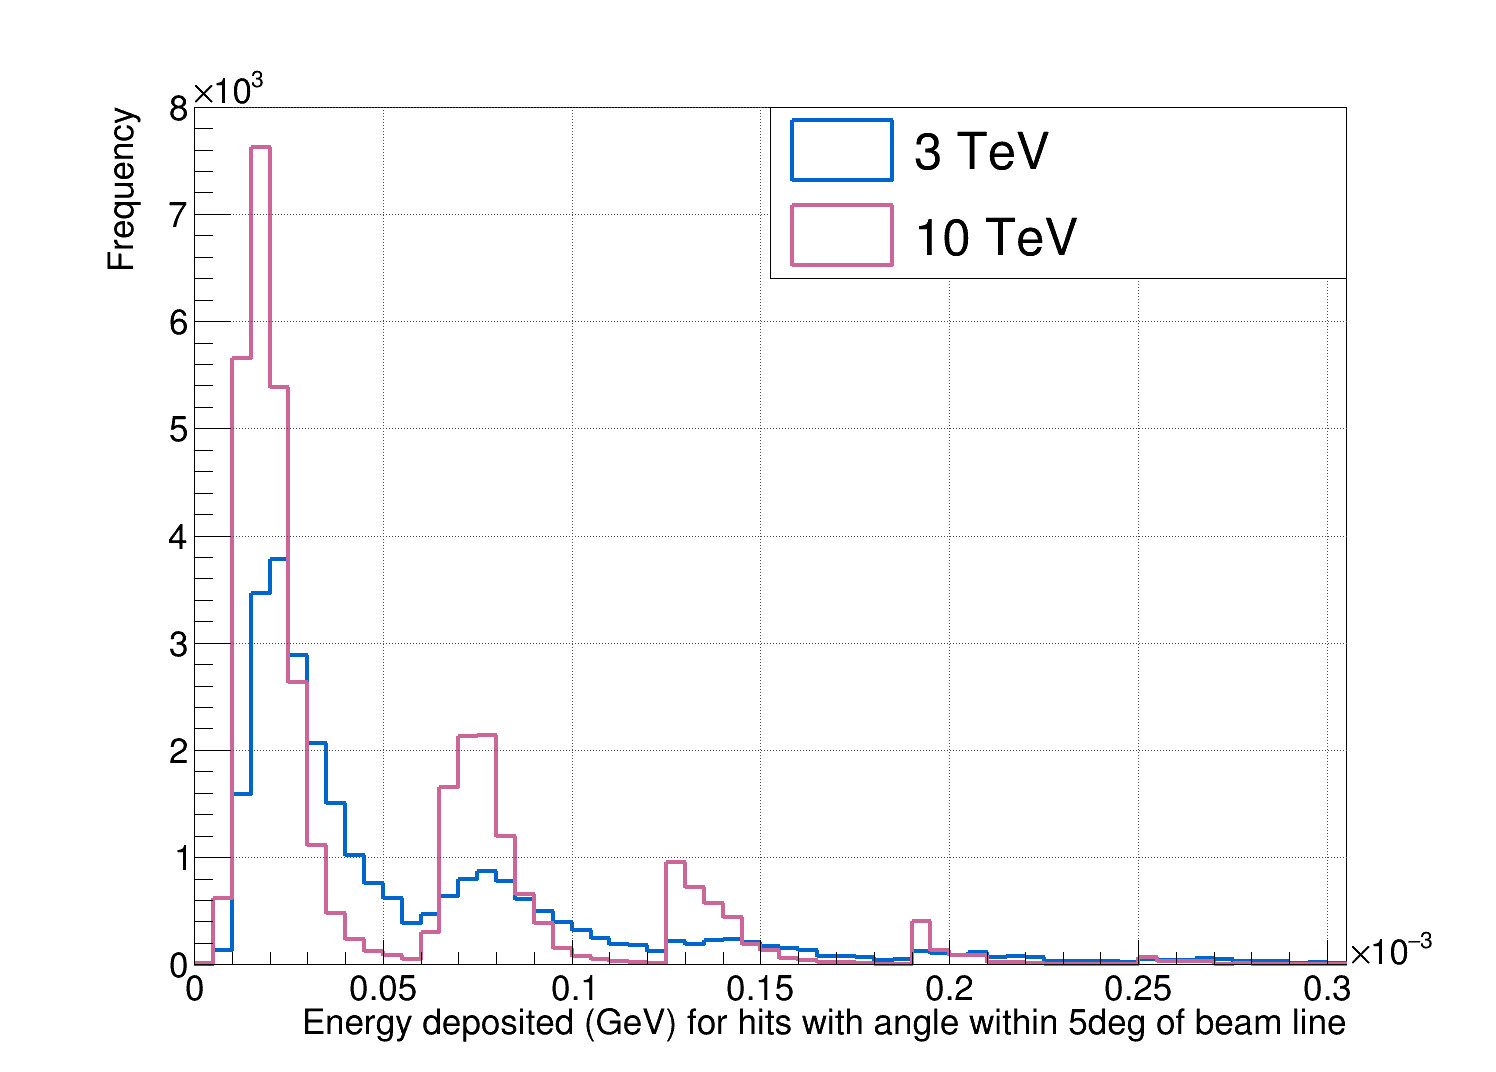

In [52]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Energy deposited (GeV) for hits with angle within 5deg of beam line;Frequency', 100, 0, 5e-4)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 8e3, 'Y')
h_ax.SetAxisRange(0, 0.3e-3, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_3tev_theta):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"edep_lowtheta_3vs10tev.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/edep_hitheta_3vs10tev.png has been created


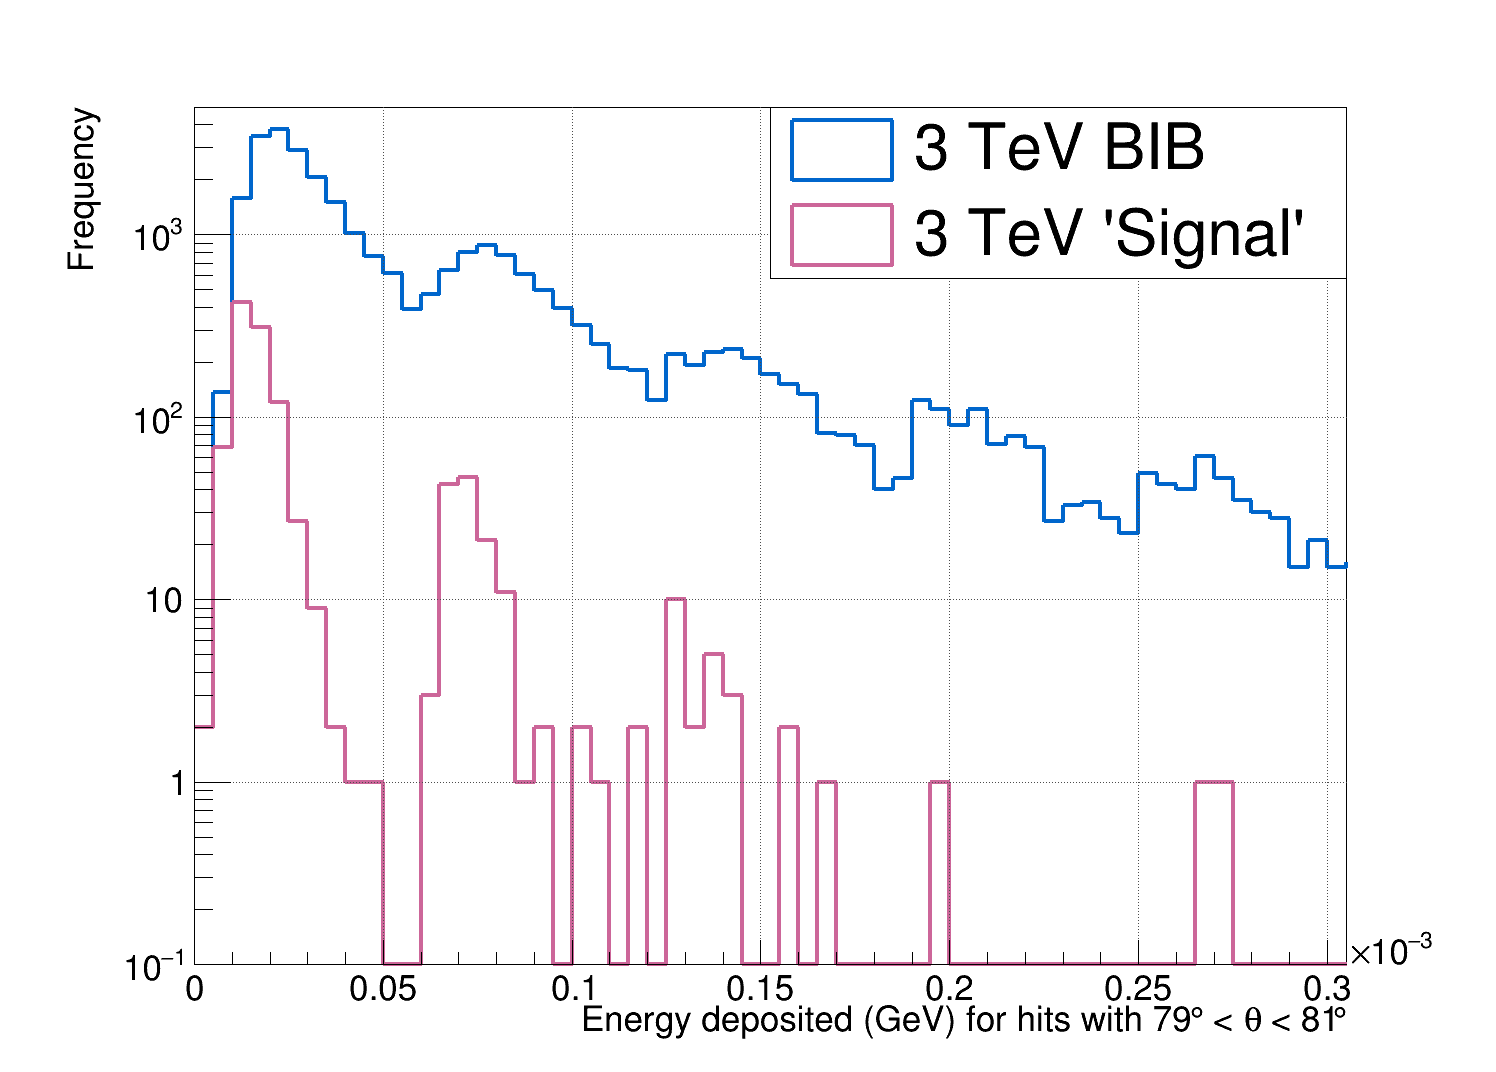

In [10]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Energy deposited (GeV) for hits with 79#circ < #theta < 81#circ;Frequency', 100, 0, 5e-4)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(True)
h_ax.SetAxisRange(1e-1, 5e3, 'Y')
h_ax.SetAxisRange(0, 0.3e-3, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

names = ["3 TeV BIB", "3 TeV 'Signal'"]
# Drawing
hists = [histos_edep90[0],histos_edep90_signal[0]]
for iT, h in enumerate(hists):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"edep_hitheta_3vs10tev.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_vertex.png has been created


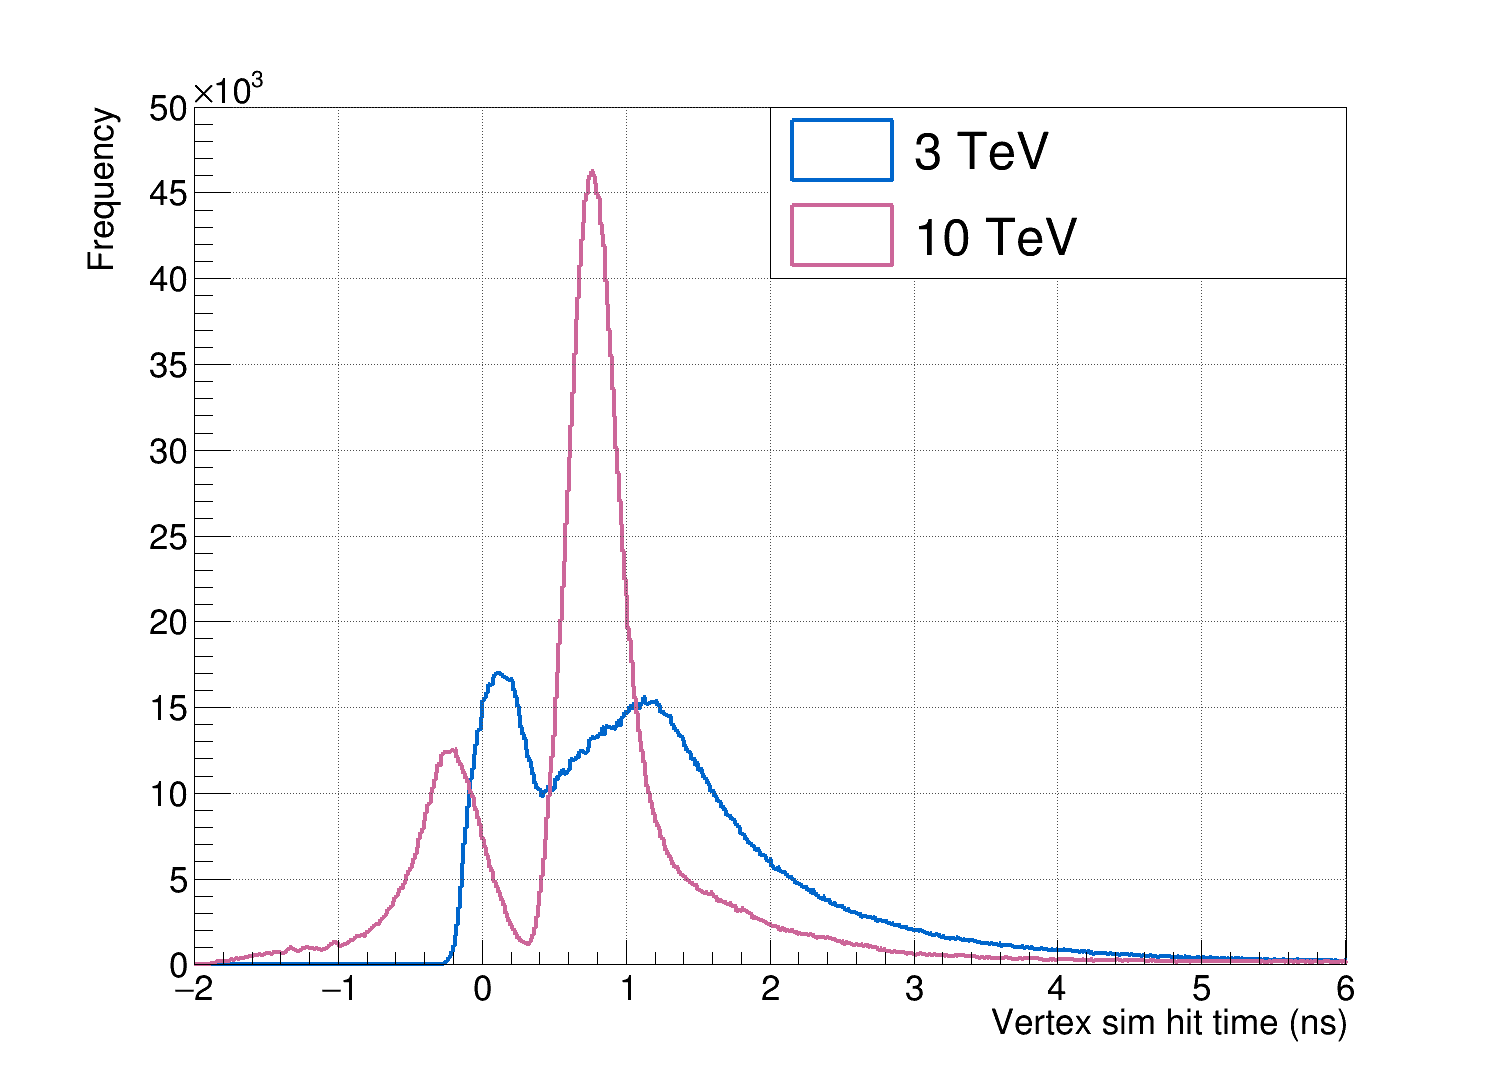

In [33]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Vertex sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 50e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_vxbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_vertex.png"))

# Compare signal and BIB vxb timing, 3TeV

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_vertex_3tev_signalvsbib.png has been created


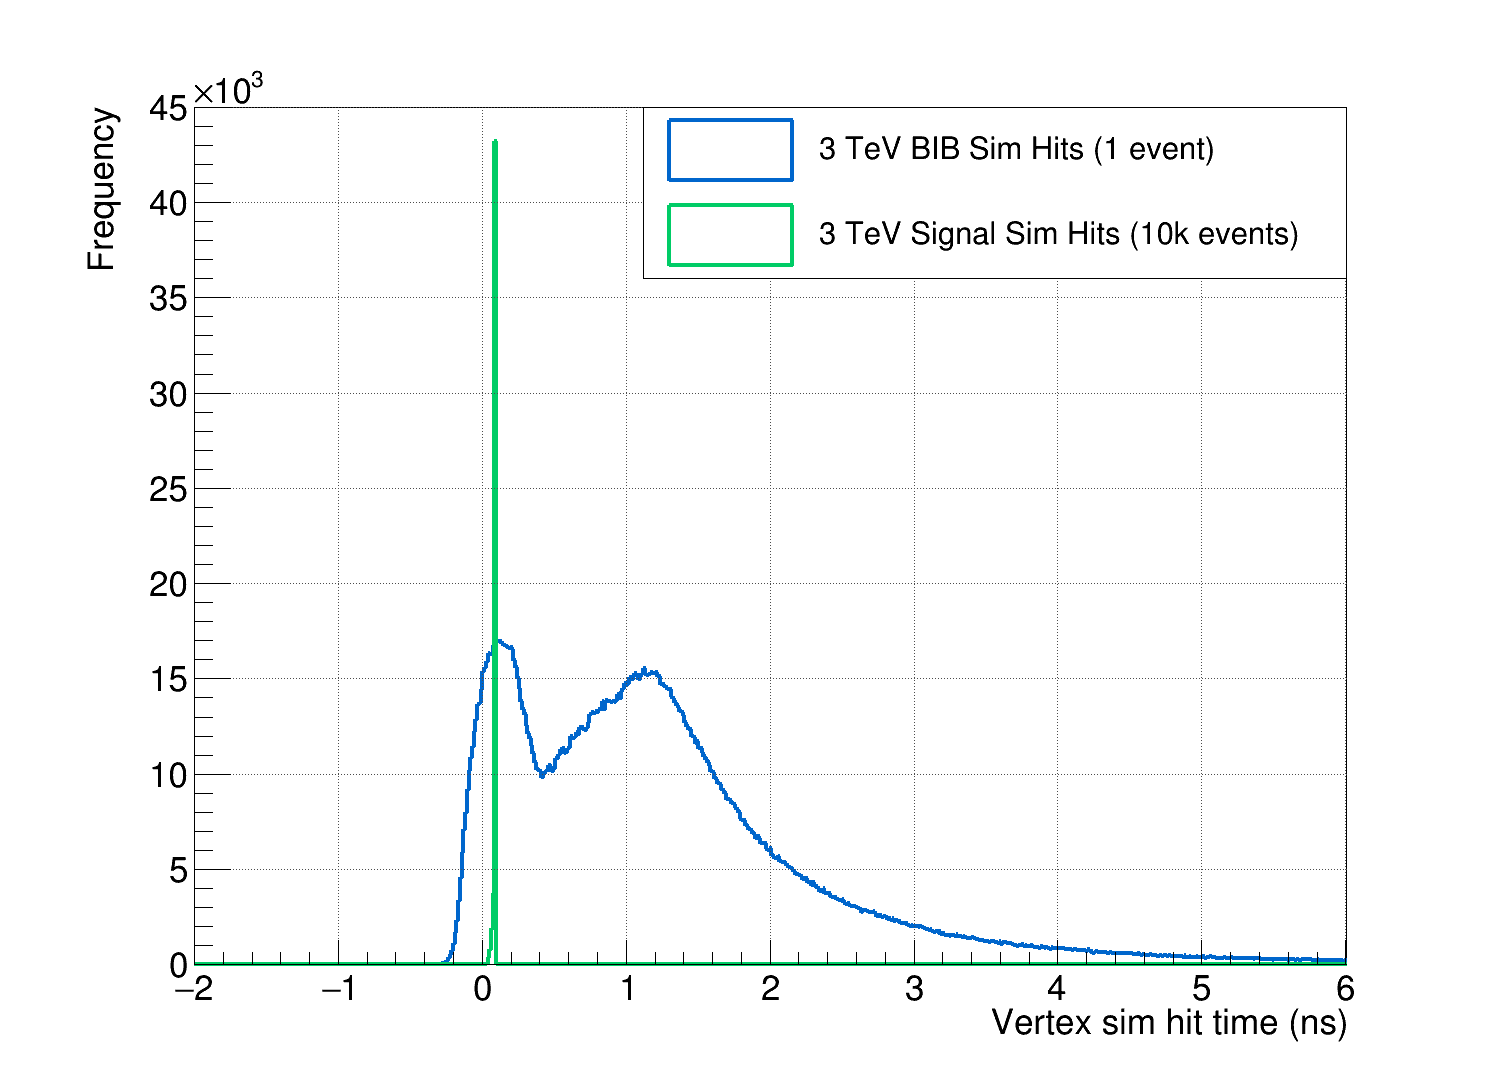

In [67]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.43, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kTeal+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Vertex sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 45e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

legnames = ["3 TeV BIB Sim Hits (1 event)", "3 TeV Signal Sim Hits (10k events)"]
# Drawing
for iT, h in enumerate(histos_3tev_vxbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, legnames[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_vertex_3tev_signalvsbib.png"))

# signal vs bib inner tracker time, 3 tev

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_innertracker_3tev_signalvsbib.png has been created


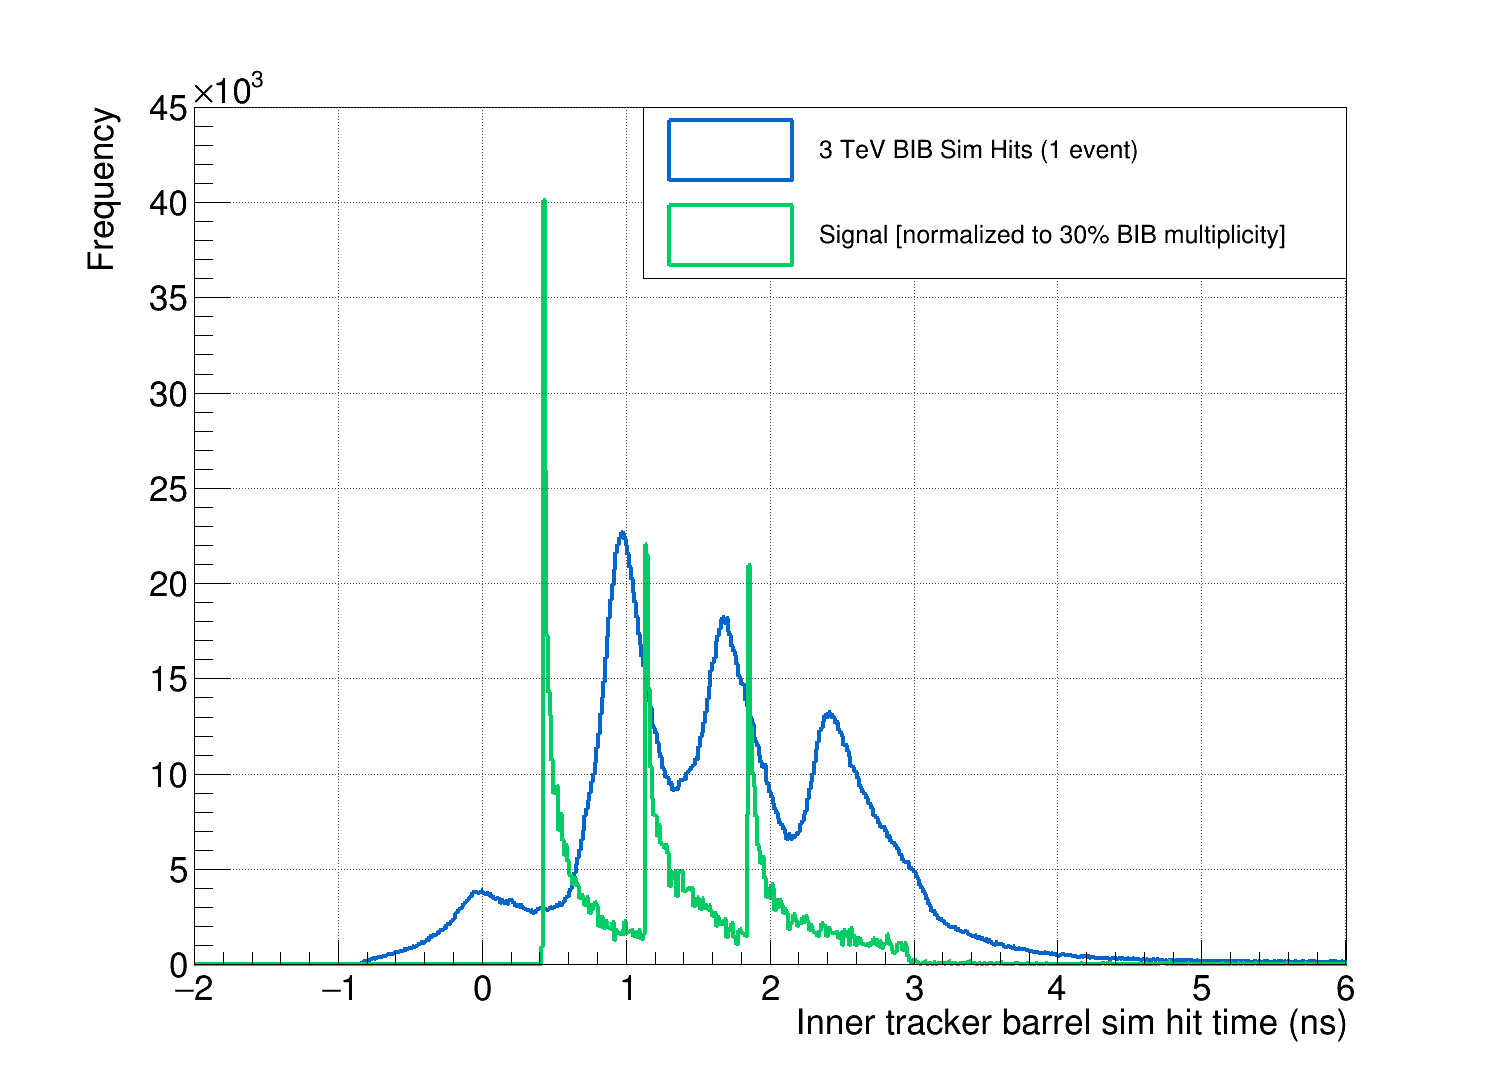

In [80]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.43, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kTeal+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Inner tracker barrel sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 45e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

legnames = ["3 TeV BIB Sim Hits (1 event)", "Signal [normalized to 30% BIB multiplicity]"]
# Drawing
for iT, h in enumerate(histos_3tev_itbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, legnames[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_innertracker_3tev_signalvsbib.png"))

# signal vs bib vxb sim hit time, 10 tev

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_vertex_10tev_signalvsbib.png has been created


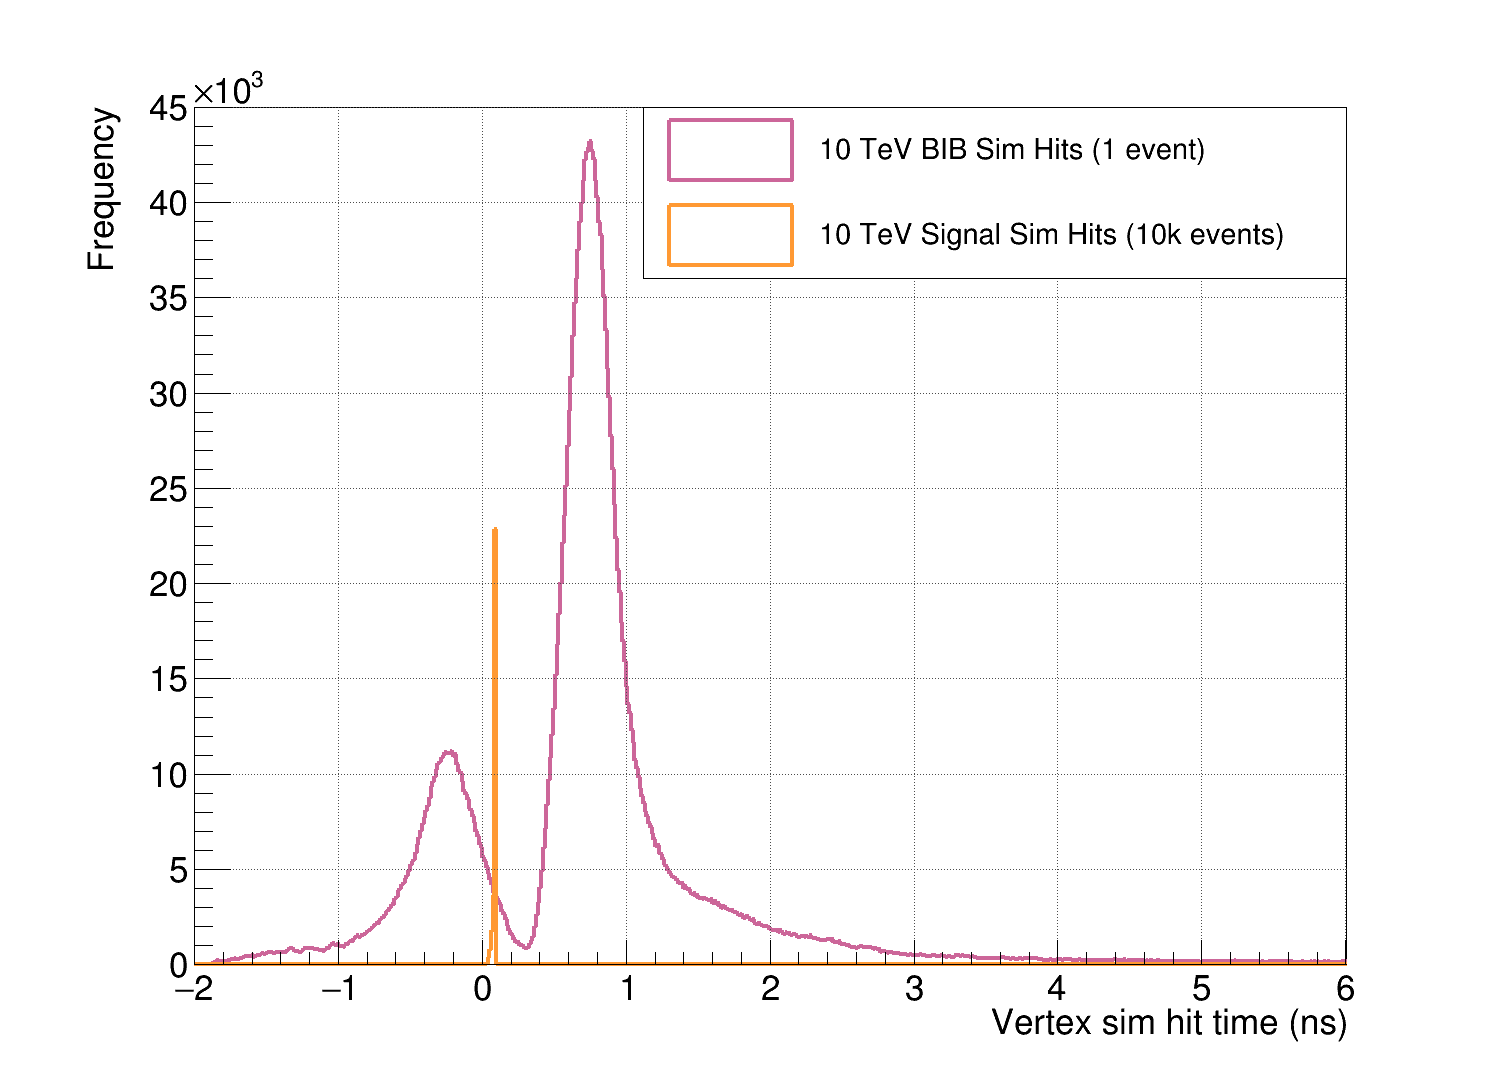

In [66]:
# canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.43, 0.74, 0.9, 0.9)
colors = [R.kPink+2, R.kOrange+1,R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Vertex sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 45e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

legnames = ["10 TeV BIB Sim Hits (1 event)", "10 TeV Signal Sim Hits (10k events)"]
# Drawing
for iT, h in enumerate(histos_10tev_vxbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, legnames[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_vertex_10tev_signalvsbib.png"))

# signal vs bib, inner tracker, 10 tev

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_innertracker_10tev_signalvsbib.png has been created


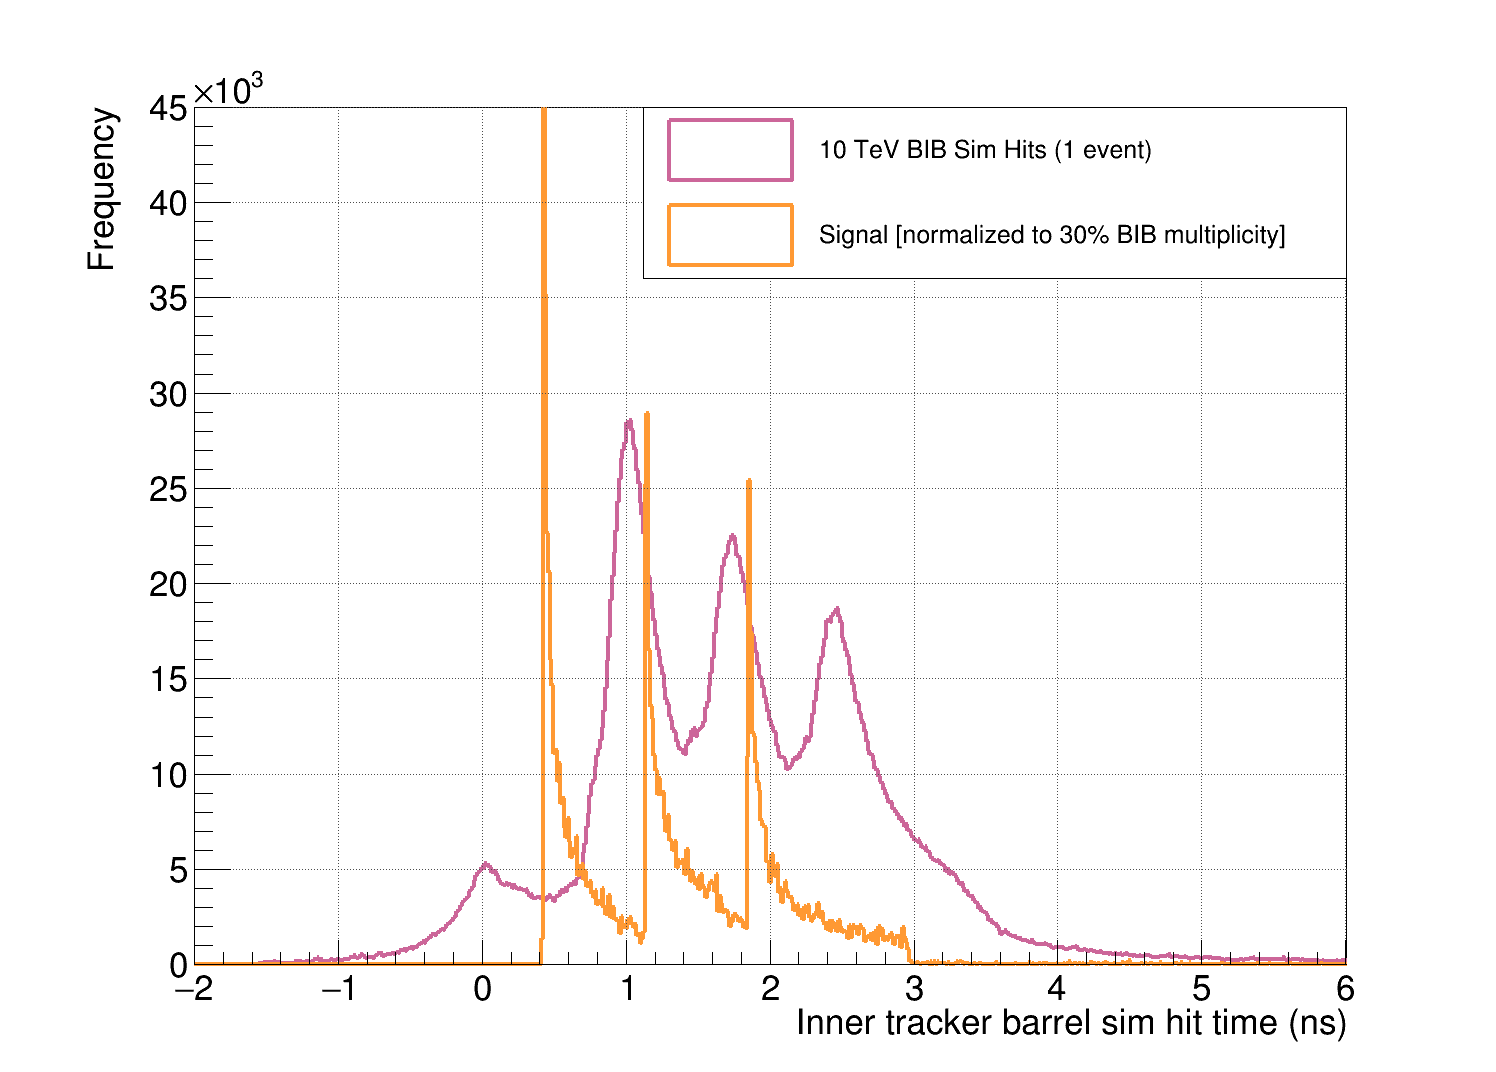

In [82]:
# canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.43, 0.74, 0.9, 0.9)
colors = [R.kPink+2, R.kOrange+1,R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Inner tracker barrel sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 45e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

legnames = ["10 TeV BIB Sim Hits (1 event)", "Signal [normalized to 30% BIB multiplicity]"]
# Drawing
for iT, h in enumerate(histos_10tev_itbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, legnames[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_innertracker_10tev_signalvsbib.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_itb.png has been created


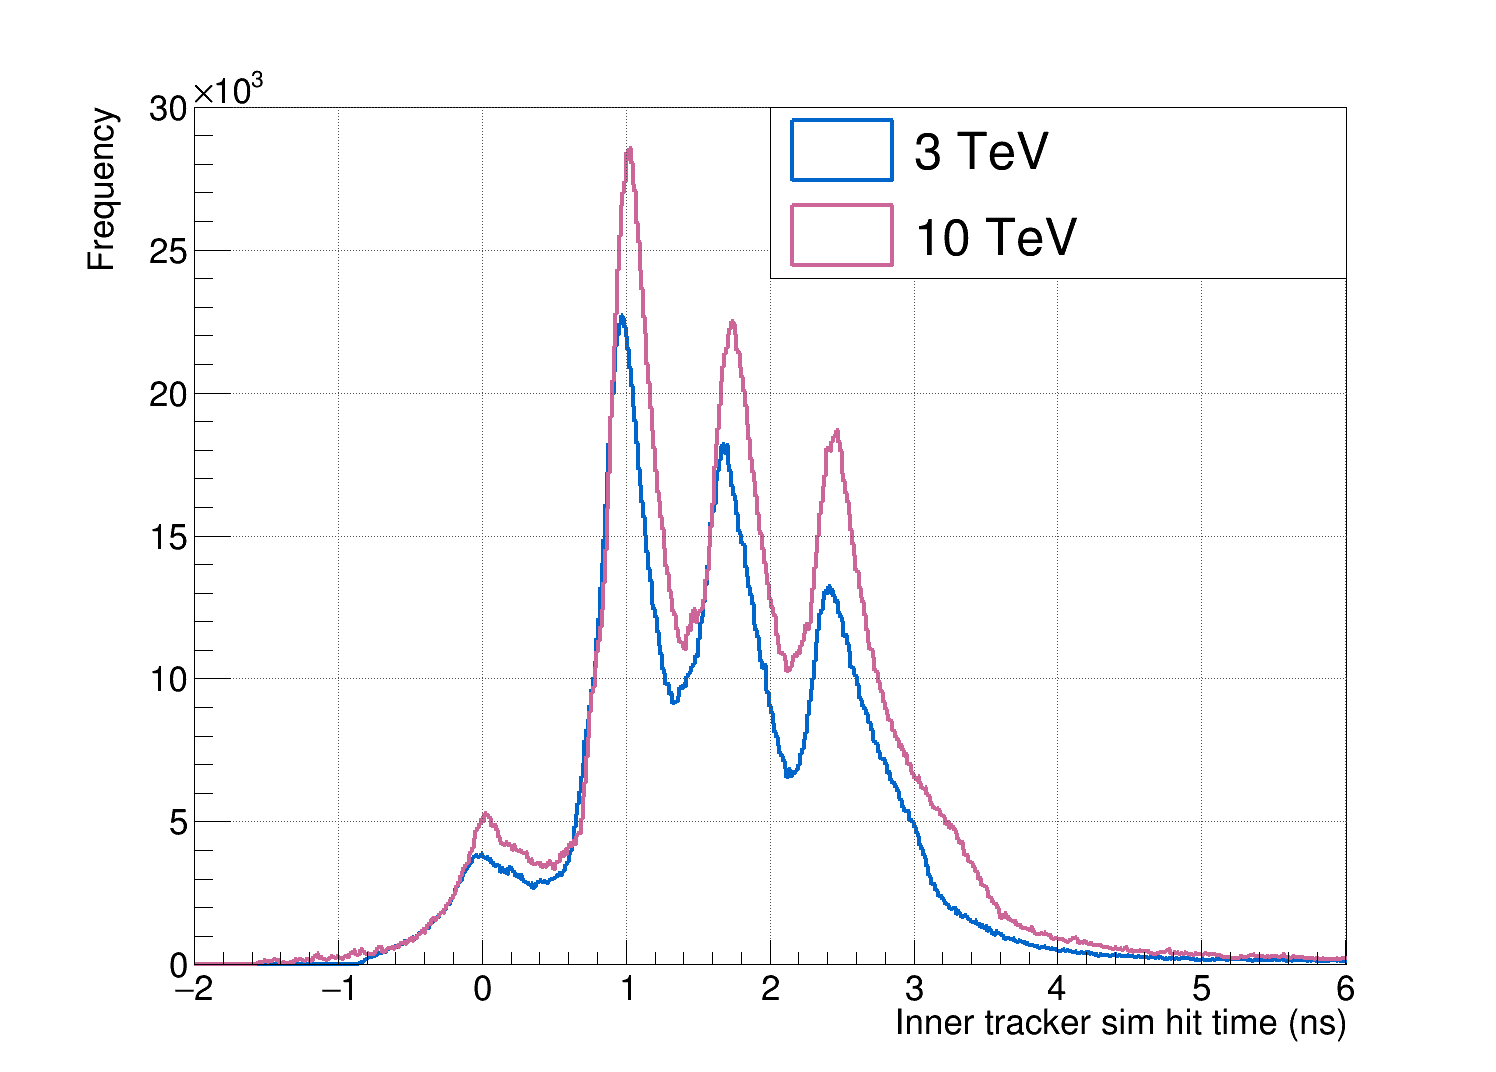

In [34]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; Inner tracker sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 30e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_itbtime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_itb.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/simhittime_both.png has been created


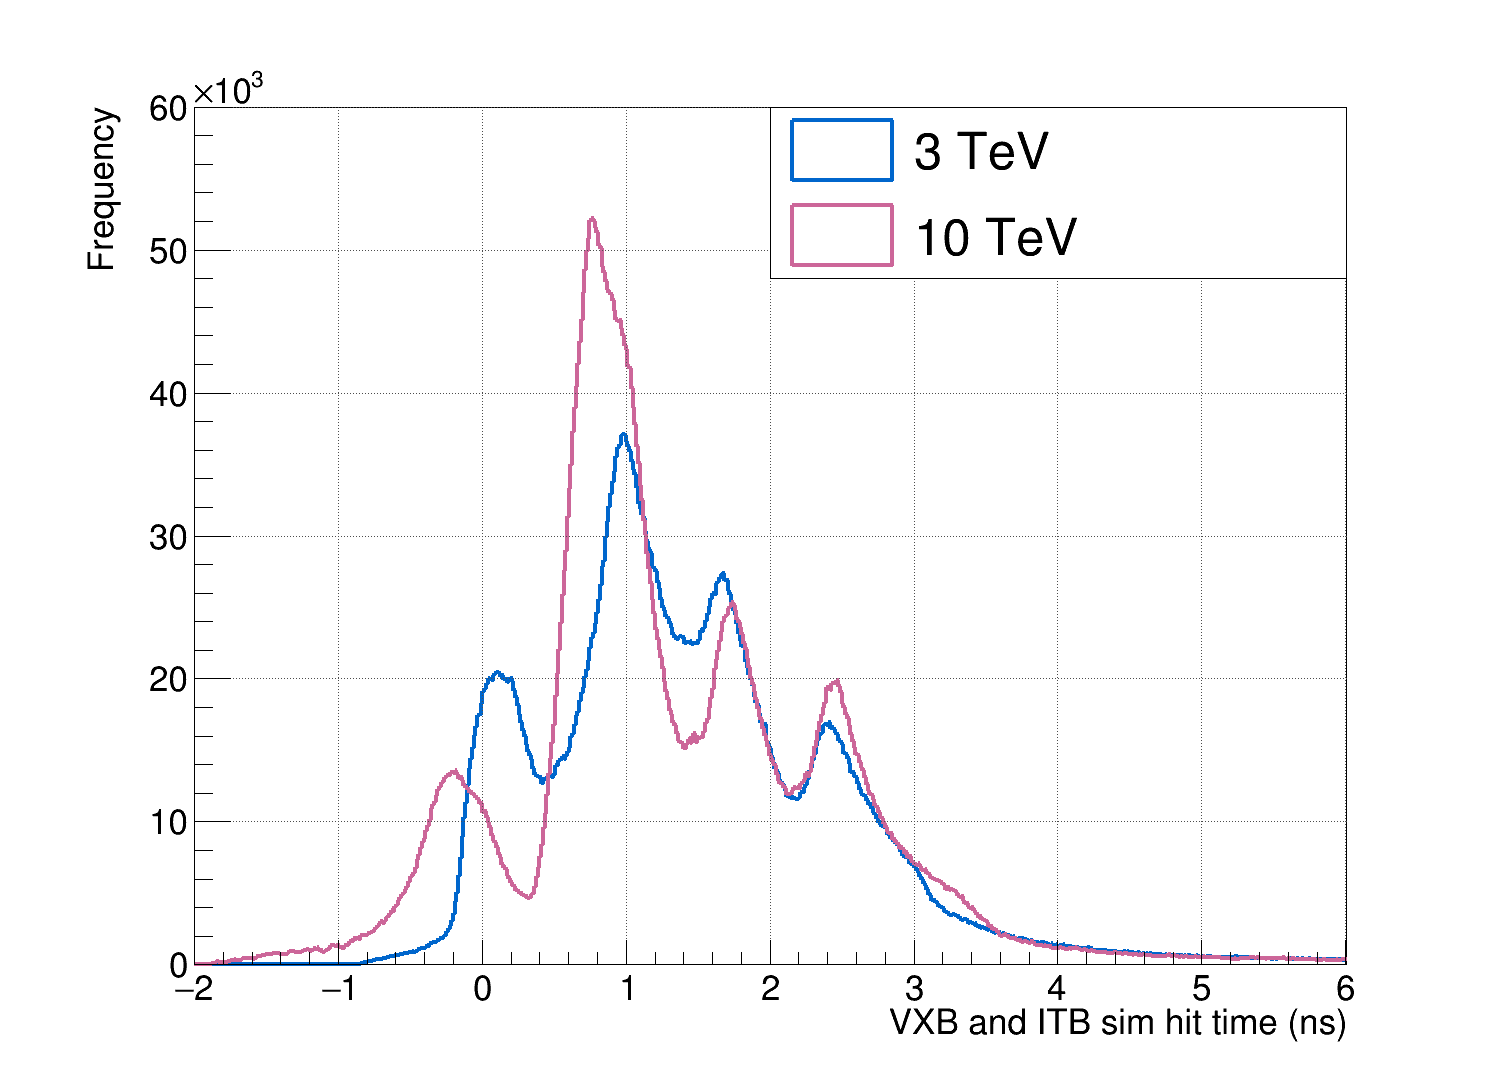

In [65]:
# set canvas
C = R.TCanvas('canvas','',1500,1100)
# R.gStyle.SetPalette(R.kBird)
C.SetLeftMargin(0.13)
C.SetRightMargin(0.1)
C.SetGrid(1,1)

R.gStyle.SetGridColor(12)
C.Clear()
C.cd()
C.SetGrid(1)

leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

h_ax = R.TH1F('h_ax', '; VXB and ITB sim hit time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C.SetLogy(False)
h_ax.SetAxisRange(0, 60e3, 'Y')
h_ax.SetAxisRange(-2, 6, 'X')
# Optimising the X axis
a = h_ax.GetXaxis()
    #a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')

# Drawing
for iT, h in enumerate(histos_alltime):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetLineWidth(4)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()
C.Draw()
C.RedrawAxis()
C.SaveAs(os.path.join(DIR_OUT,"simhittime_both.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/comp_clustershittime_withcuts_3tev.png has been created


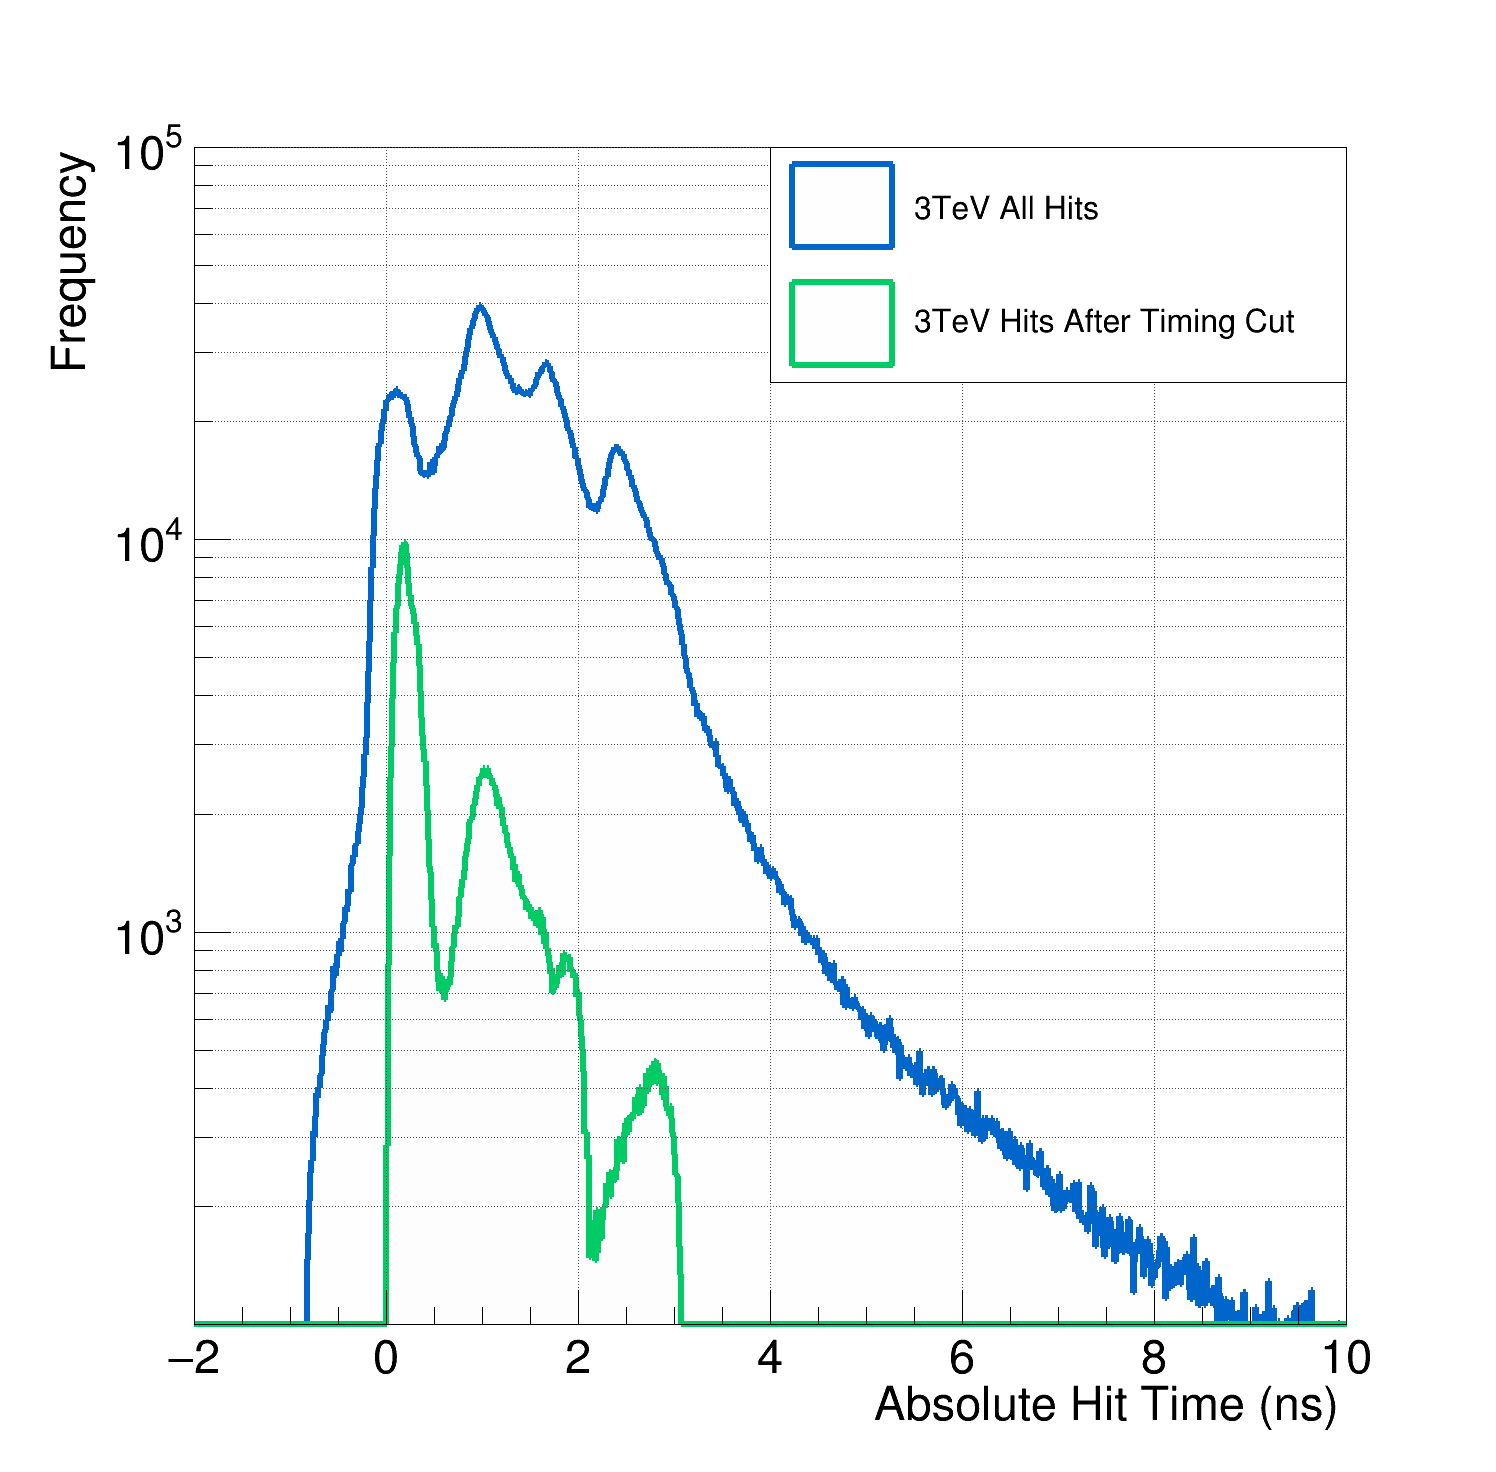

In [26]:
# Draw 3 TeV bad boys

# set canvas
C1 = R.TCanvas('canvas','',1500,1500)
# R.gStyle.SetPalette(R.kBird)
C1.SetLeftMargin(0.13)
C1.SetRightMargin(0.1)
C1.SetGrid(1,1)

# extract contents from files
histos_all = [files_in[i].MySimHitHistos.All.t for i in range(2)]
histos_vert = [files_in[i].MySimHitHistos.Vertex.t for i in range(2)]
histos_it = [files_in[i].MySimHitHistos.IT.t for i in range(2)]

histos_all_timingcut = [files_in_timingcut[i].MySimHitHistos.All.t for i in range(2)]

# make plot
names = [
    't < 15 ns',
    '|t| < 3 *{$\sigma_{reso}$}',
]

R.gStyle.SetGridColor(12)
C1.Clear()
C1.cd()
C1.SetGrid(1)

names = ["3TeV All Hits", "3TeV Hits After Timing Cut"]
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)
colors = [R.kAzure+2, R.kTeal+2, R.kPink+2, R.kAzure+7, R.kTeal+2]

# colors = [1, 11, 15]
# fills = [0, 12, 16]
h_ax = R.TH1F('h_ax', ';Absolute Hit Time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C1.SetLogy(True)
h_ax.SetAxisRange(100, 1e5, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
hists = [histos_all[0],histos_all_timingcut[0]]
for iT, h in enumerate(hists):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetFillColorAlpha(1,0)
    h.SetLineWidth(6)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()

t = R.TText(800, 1e3, "Time Reso: 30ps")
t.SetTextAlign(22)
t.SetTextColor(1)
t.Draw()
C1.Draw()
C1.RedrawAxis()
C1.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"hittime_withcuts_3tev.png"))

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Warning in <TFile::Append>: Replacing existing TH1: h_ax (Potential memory leak).
Info in <TCanvas::Print>: png file /Users/chris/Desktop/MC/plots/comp_3vs10tev/comp_clustershittime_withcuts_10tev.png has been created


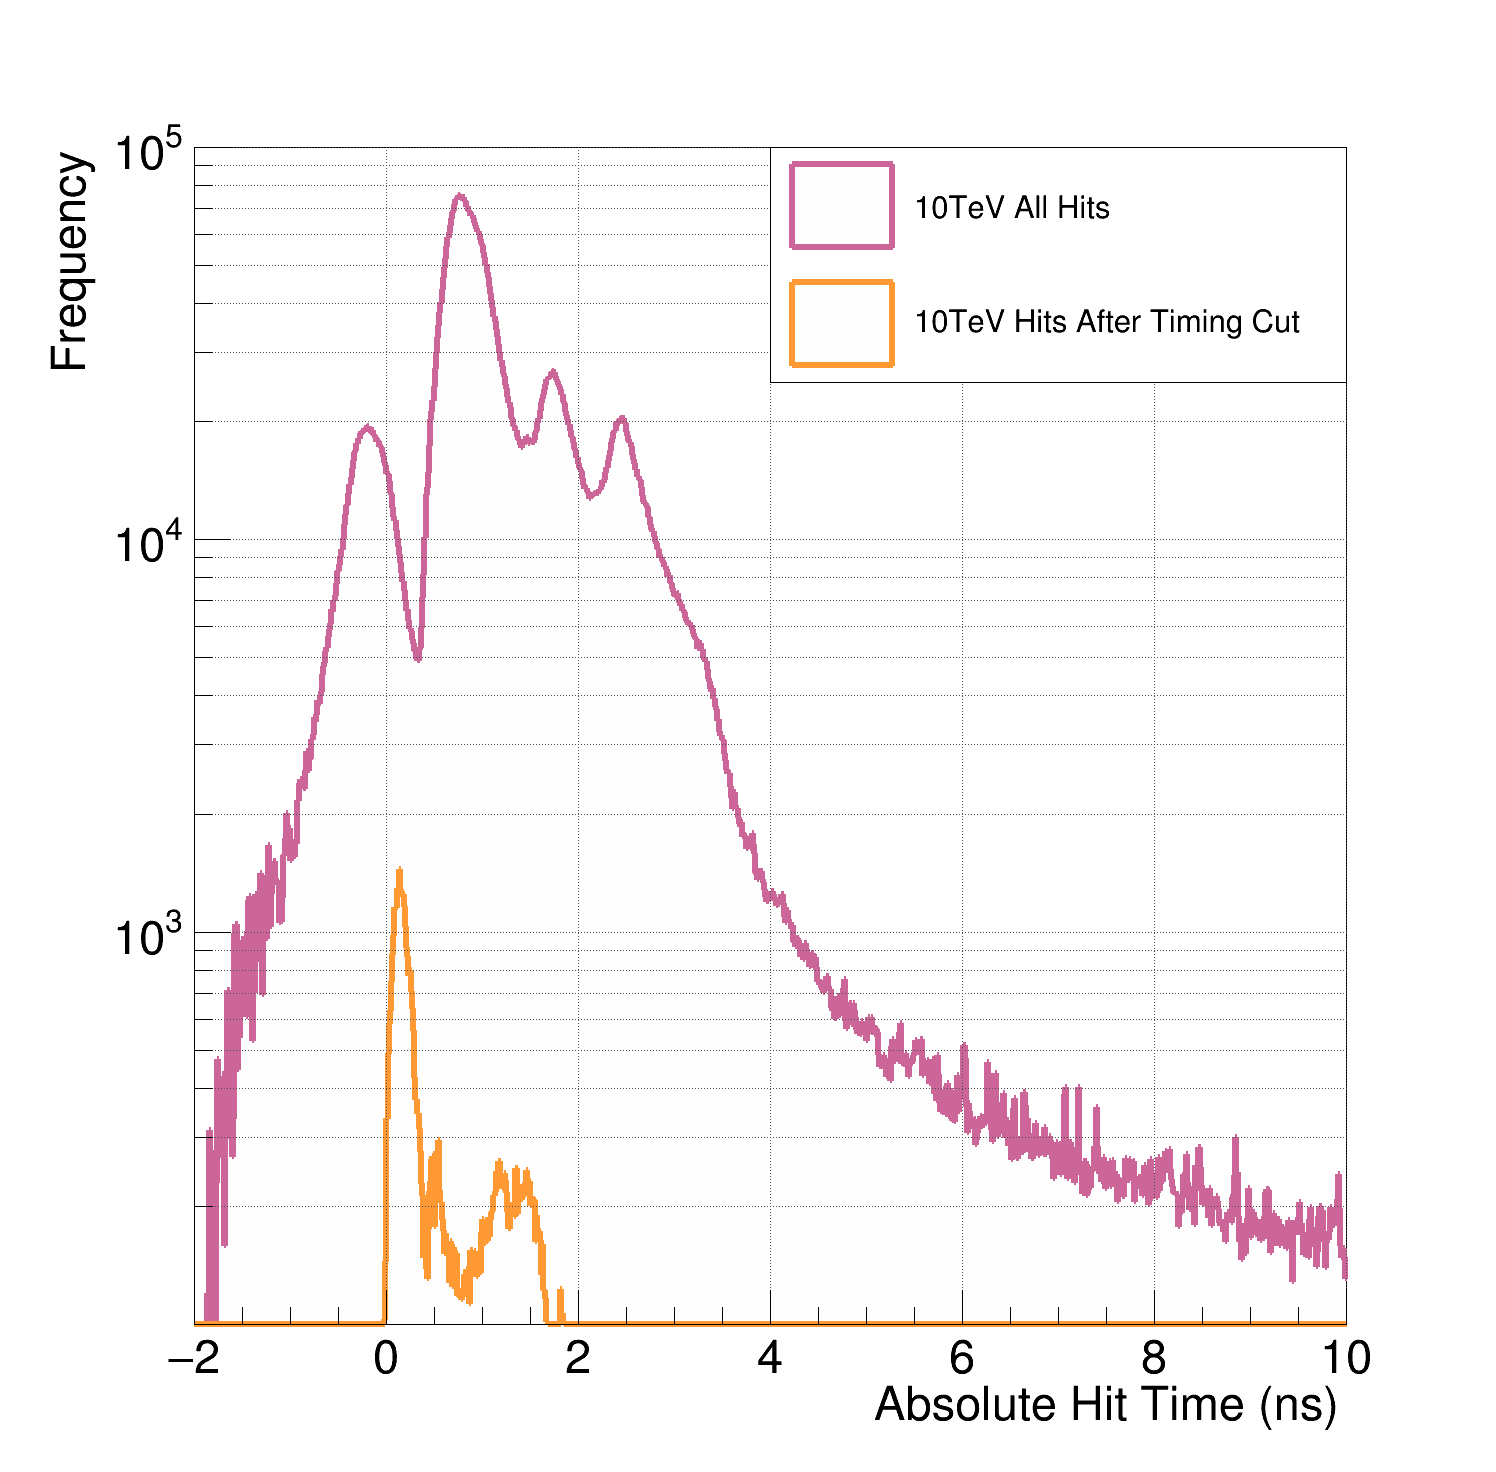

In [27]:
# Draw 10 TeV bad boys
colors = [R.kPink+2, R.kOrange+1,R.kAzure+7, R.kTeal+2]

# set canvas
C1 = R.TCanvas('canvas','',1500,1500)
# R.gStyle.SetPalette(R.kBird)
C1.SetLeftMargin(0.13)
C1.SetRightMargin(0.1)
C1.SetGrid(1,1)

# extract contents from files
histos_all = [files_in[i].MySimHitHistos.All.t for i in range(2)]
histos_vert = [files_in[i].MySimHitHistos.Vertex.t for i in range(2)]
histos_it = [files_in[i].MySimHitHistos.IT.t for i in range(2)]

histos_all_timingcut = [files_in_timingcut[i].MySimHitHistos.All.t for i in range(2)]

# make plot
names = [
    't < 15 ns',
    '|t| < 3 *{$\sigma_{reso}$}',
]

R.gStyle.SetGridColor(12)
C1.Clear()
C1.cd()
C1.SetGrid(1)

names = ["10TeV All Hits", "10TeV Hits After Timing Cut"]
leg = R.TLegend(0.515, 0.74, 0.9, 0.9)

# colors = [1, 11, 15]
# fills = [0, 12, 16]
h_ax = R.TH1F('h_ax', ';Absolute Hit Time (ns);Frequency', 1000, -2, 10)
h_ax.GetYaxis().SetMaxDigits(3)
C1.SetLogy(True)
h_ax.SetAxisRange(100, 1e5, 'Y')
# Optimising the X axis
a = h_ax.GetXaxis()
#a.SetNdivisions(-208)
# Drawing the axes
h_ax.Draw('AXIS')
h_ax.Draw('AXIG same')
# Drawing
hists = [histos_all[1],histos_all_timingcut[1]]
for iT, h in enumerate(hists):
    h.SetLineColor(colors[iT])
    #h.SetFillColor(fills[iT])
    h.SetFillColorAlpha(1,0)
    h.SetLineWidth(6)
    leg_type = 'F'
    leg.AddEntry(h, names[iT], leg_type)
    h.Draw('HIST same')
h_ax.Draw('AXIG same')
leg.Draw()

t = R.TText(800, 1e3, "Time Reso: 30ps")
t.SetTextAlign(22)
t.SetTextColor(1)
t.Draw()
C1.Draw()
C1.RedrawAxis()
C1.SaveAs(os.path.join(DIR_OUT,STUDY_NAME+"hittime_withcuts_10tev.png"))